## CLSNet_lab task3: Performing EDA and Developing Classification models on the enclosed datasets.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

np.random.seed(12345)
from sklearn import metrics
from sklearn.metrics import r2_score
import sklearn
from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import train_test_split,StratifiedKFold
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import GridSearchCV, cross_val_score
%config InlineBackend.figure_format = 'retina'


In [100]:
taxi=pd.read_csv('/content/taxi.csv')
tourist=pd.read_csv('/content/tourist.csv')

In [101]:
taxi_df=taxi.copy()
tourist_df=tourist.copy() #creating copies of datasets for performing manipulations

In [102]:
tourist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33029 entries, 0 to 33028
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VehicleID        33029 non-null  object 
 1   trajectory_id    33029 non-null  object 
 2   date_time_o      33029 non-null  object 
 3   date_time_d      33029 non-null  object 
 4   category_o       33029 non-null  object 
 5   subcategory_o    33029 non-null  object 
 6   category_d       33029 non-null  object 
 7   subcategory_d    33029 non-null  object 
 8   lat_o            33029 non-null  float64
 9   lon_o            33029 non-null  float64
 10  lat_d            33029 non-null  float64
 11  lon_d            33029 non-null  float64
 12  distance         33029 non-null  int64  
 13  time_used        33029 non-null  float64
 14  tourist_type     33029 non-null  object 
 15  trajectory_type  33029 non-null  object 
dtypes: float64(5), int64(1), object(10)
memory usage: 4.0+ MB


TOURIST_DF COLUMN INFO:

1) Vehicle_ID: Contains ID of vehicles accessed during each trip.

2) trajectory_ID: Unique ID of trajectories followed by each vehicle during a trip

3) date_time_o: Time and date at which tourist left accomodation

4) date_time_d: Time and date at which tourist reached destination

5) category_o and subcategory_o: Describes type of accomodation of each tourist

6) category_d and subcategory_d: Describes name and type of destinations of each tourist

7) (lat_o,lon_o), (lat_d,lon_d): coordinates of accomodations and destinations of tourists respectively

8) distance: distance covered during trip to destination

9) time_used: time taken to reach destination

10)tourist_type: classification of tourists on the basis of spending

11)trajectory_type: classification of trajectories on the basis of final destinations.

# # DATA CLEANING AND PRE-PROCESSING

In [103]:
tourist_df['tourist_type'].unique()

array(['High spending tourist', 'Economical spending tourist'],
      dtype=object)

In [104]:
tourist_df['trajectory_type'].unique()

array(['NightlifeTrip', 'SpaTrip', 'FoodAndDrinkTrip', 'ShoppingTrip',
       'ReligiousTrip', 'LeisureTrip'], dtype=object)

In [105]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31132 entries, 0 to 31131
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   VehicleID_x       31132 non-null  object 
 1   gpsvalid_x        31132 non-null  int64  
 2   lat_x             31132 non-null  float64
 3   lon_x             31132 non-null  float64
 4   date_time_x       31132 non-null  object 
 5   speed_x           31132 non-null  int64  
 6   heading_x         31132 non-null  int64  
 7   for_hire_light_x  31132 non-null  int64  
 8   engine_acc_x      31132 non-null  int64  
 9   geometry_x        31132 non-null  object 
 10  trip_point_x      31132 non-null  object 
 11  trajectory_id     31132 non-null  object 
 12  VehicleID_y       31132 non-null  object 
 13  gpsvalid_y        31132 non-null  int64  
 14  lat_y             31132 non-null  float64
 15  lon_y             31132 non-null  float64
 16  date_time_y       31132 non-null  object

In [106]:
taxi_df.columns

Index(['VehicleID_x', 'gpsvalid_x', 'lat_x', 'lon_x', 'date_time_x', 'speed_x',
       'heading_x', 'for_hire_light_x', 'engine_acc_x', 'geometry_x',
       'trip_point_x', 'trajectory_id', 'VehicleID_y', 'gpsvalid_y', 'lat_y',
       'lon_y', 'date_time_y', 'speed_y', 'heading_y', 'for_hire_light_y',
       'engine_acc_y', 'geometry_y', 'trip_point_y'],
      dtype='object')

INFORMATION ABOUT COLUMNS FROM TAXI_DF:

1) VehicleID_x/y: contains unique ID of each ride taken

2) gpsvalid_x/y: contains information about the gps coordinates being valid or not at the start and end of each ride.

3) for_hire_light/x/y: status of hiring light of taxi at both start and end of ride.

4) geometry_x: contains coordinates of start of each taxi trip

5) geometry_y: contains coordinates of end of each taxi trip

6) speed_x/y: last recorded speed of taxi at start and end points

7) date_time_x/y: contains information about date on which the ride was called for and the time of start of ride and time at end of ride.


In [107]:
taxi_df[['date_time_x','date_time_y']]

date_time_x          date_time_y
0      2019-04-01 12:04:05  2019-04-01 12:10:05
1      2019-04-01 12:37:05  2019-04-01 13:02:05
2      2019-04-01 13:17:05  2019-04-01 13:39:05
3      2019-04-01 14:01:05  2019-04-01 14:16:05
4      2019-04-01 14:43:05  2019-04-01 14:58:05
...                    ...                  ...
31127  2019-04-01 23:02:48  2019-04-01 23:14:06
31128  2019-04-01 00:00:03  2019-04-01 00:15:03
31129  2019-04-01 00:21:03  2019-04-01 00:43:04
31130  2019-04-01 01:05:03  2019-04-01 01:18:07
31131  2019-04-01 01:21:06   2019-04-01 01:46:4

[31132 rows x 2 columns]

In [108]:
taxi_df[['heading_x','heading_y']]

heading_x  heading_y
0            177      141.0
1            189      289.0
2            184      207.0
3              9      309.0
4            117      201.0
...          ...        ...
31127        176      302.0
31128        249      126.0
31129        213       10.0
31130        322      186.0
31131        336        NaN

[31132 rows x 2 columns]

In [109]:
taxi_df.drop(['gpsvalid_x','gpsvalid_y'],axis=1,inplace=True)

In [110]:
col_list_1=['for_hire_light_x','for_hire_light_y','trip_point_x','trip_point_y']

In [111]:
for col in col_list_1:
    print(taxi_df[col].unique())

[0]
[ 1. nan]
['start']
['end' nan]


In [112]:
taxi_df.drop(col_list_1,axis=1,inplace=True)
#deleted because these entries contain only single values which will be of no use either in EDA or while making the classification model.

In [113]:
taxi_df[['geometry_x','geometry_y']]

geometry_x                  geometry_y
0      POINT (100.78991 13.64769)  POINT (100.78381 13.65319)
1      POINT (100.67939 13.64767)  POINT (100.67389 13.67083)
2      POINT (100.67874 13.65371)  POINT (100.67092 13.69173)
3      POINT (100.61034 13.68211)  POINT (100.59269 13.71405)
4      POINT (100.57965 13.74752)  POINT (100.59861 13.74763)
...                           ...                         ...
31127  POINT (100.67855 13.65859)  POINT (100.67788 13.65177)
31128   POINT (100.45564 13.6785)  POINT (100.48765 13.68564)
31129  POINT (100.49769 13.65398)  POINT (100.49689 13.65267)
31130  POINT (100.60104 13.73423)  POINT (100.55158 13.71034)
31131  POINT (100.54293 13.70874)                         NaN

[31132 rows x 2 columns]

In [114]:
taxi_df.drop(['geometry_x','geometry_y'],axis=1,inplace=True)

In [115]:
taxi_df[['lat_x','lon_x']]

lat_x      lon_x
0      13.64769  100.78991
1      13.64767  100.67939
2      13.65371  100.67874
3      13.68211  100.61034
4      13.74752  100.57965
...         ...        ...
31127  13.65859  100.67855
31128  13.67850  100.45564
31129  13.65398  100.49769
31130  13.73423  100.60104
31131  13.70874  100.54293

[31132 rows x 2 columns]

In [116]:
taxi_df[['lat_y','lon_y']]

lat_y      lon_y
0      13.65319  100.78381
1      13.67083  100.67389
2      13.69173  100.67092
3      13.71405  100.59269
4      13.74763  100.59861
...         ...        ...
31127  13.65177  100.67788
31128  13.68564  100.48765
31129  13.65267  100.49689
31130  13.71034  100.55158
31131  13.66620  100.50431

[31132 rows x 2 columns]

In [117]:
taxi_df['engine_acc_x'].unique()

array([1, 0])

In [118]:
taxi_df.drop(['VehicleID_x'],axis=1,inplace=True)

In [119]:
taxi_df[['date_time_x','date_time_y']] #we need to separate out the times of arrival and departures as well as the dates.

date_time_x          date_time_y
0      2019-04-01 12:04:05  2019-04-01 12:10:05
1      2019-04-01 12:37:05  2019-04-01 13:02:05
2      2019-04-01 13:17:05  2019-04-01 13:39:05
3      2019-04-01 14:01:05  2019-04-01 14:16:05
4      2019-04-01 14:43:05  2019-04-01 14:58:05
...                    ...                  ...
31127  2019-04-01 23:02:48  2019-04-01 23:14:06
31128  2019-04-01 00:00:03  2019-04-01 00:15:03
31129  2019-04-01 00:21:03  2019-04-01 00:43:04
31130  2019-04-01 01:05:03  2019-04-01 01:18:07
31131  2019-04-01 01:21:06   2019-04-01 01:46:4

[31132 rows x 2 columns]

In [120]:
taxi_df['date_x']=pd.to_datetime(taxi_df['date_time_x'])

In [121]:
dt_x=[]
for st in taxi_df['date_time_x']:
    dt_x.append(st.split( ))

In [122]:
dt_y=[]
for st in taxi_df['date_time_y']:
    dt_y.append(st.split( ))

In [123]:
taxi_df['date_y']=pd.to_datetime(taxi_df['date_time_y'])

In [124]:
taxi_df.drop(['date_time_x','date_time_y'],axis=1,inplace=True)

In [125]:
taxi_df[['speed_x','speed_y']]

speed_x  speed_y
0            3     26.0
1            5     10.0
2            0     40.0
3           16      7.0
4            0      0.0
...        ...      ...
31127       13     55.0
31128       27     28.0
31129        1     44.0
31130       21      7.0
31131       57      NaN

[31132 rows x 2 columns]

## EXPLORATORY DATA ANALYSIS OF TAXI_DF DATASET:

In [126]:
taxi_df.columns

Index(['lat_x', 'lon_x', 'speed_x', 'heading_x', 'engine_acc_x',
       'trajectory_id', 'VehicleID_y', 'lat_y', 'lon_y', 'speed_y',
       'heading_y', 'engine_acc_y', 'date_x', 'date_y'],
      dtype='object')

In [127]:
len(taxi_df['VehicleID_y'].unique())  #output shows that over 3877 unique vehicles were used for the trips taken in the entire time period.

3184

In [128]:
len(taxi_df['trajectory_id'].unique()) #output shows that almost all routes taken by taxis during the time period were unique, and very few were repeated.

31129

In [129]:
fig=px.density_mapbox(taxi_df,lat='lat_x',lon='lon_x',title='Taxi hiring destinations',radius=1,center=dict(lat=13.70703,lon=100.6003),zoom=9,mapbox_style='stamen-toner')
fig.show()

The density map plotted above for the taxi trips shows that majority of the trips were taken from the central areas of the city of Bangkok, the ride hire frequency gradually decreases as we move outward towards the edge of the city.

In [130]:
#instances when the taxi was already halted when approached for trips
fig=px.density_mapbox(taxi_df[taxi_df['speed_x']==0],lat='lat_x',lon='lon_x',radius=1,center=dict(lat=13.70703,lon=100.6003),zoom=9,color_continuous_scale='Viridis',mapbox_style='stamen-toner')
fig.show()

The above map shows the density of how many taxis were already in a halt state when approached. Approximately 50% of all recorded taxi rides were approachable without any concern to the safety of the citizens/tourists.

In [131]:
taxi_df['speed_x'][taxi_df['speed_x']==0].count()

13329

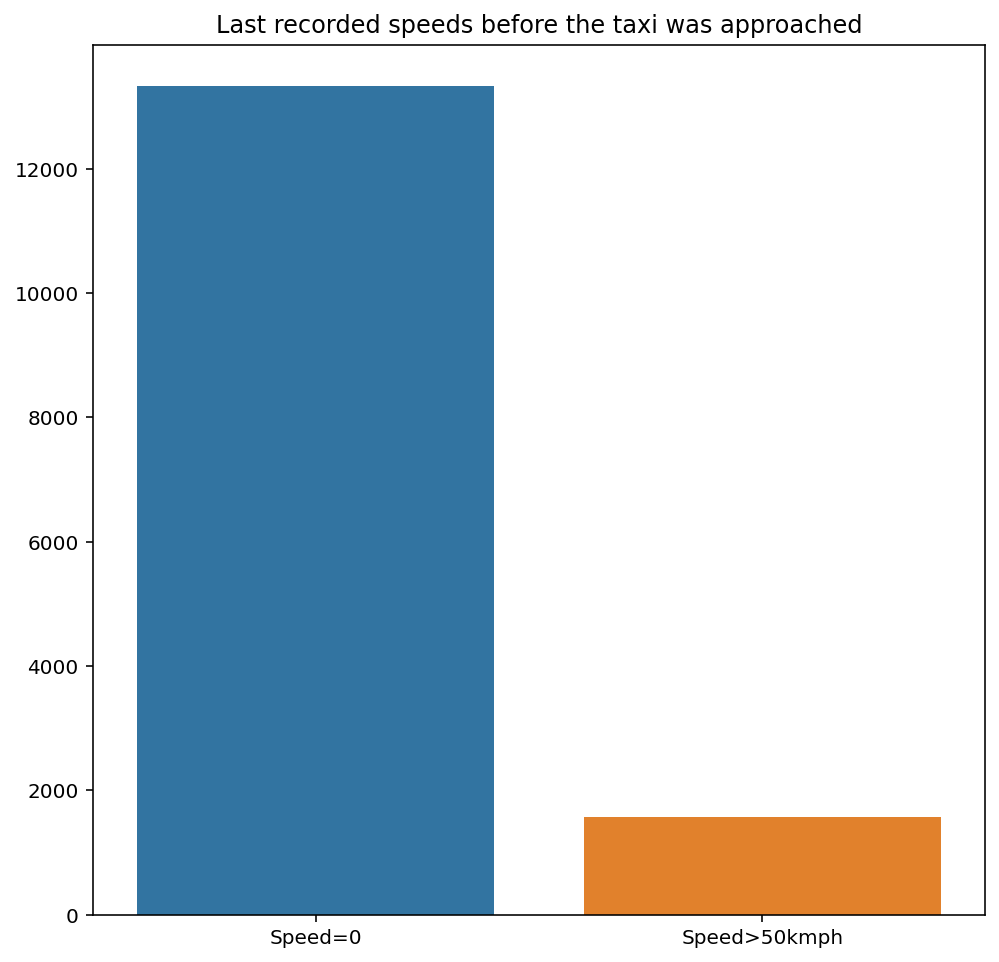

In [132]:
plt.figure(figsize=(8,8))
plt.title("Last recorded speeds before the taxi was approached")
plt
sns.barplot(x=['Speed=0','Speed>50kmph'],y=[taxi_df['speed_x'][taxi_df['speed_x']==0].count(),taxi_df['speed_x'][taxi_df['speed_x']>=50].count()])

Now we will see which taxis were moving at a speed that would threaten the lives of civilians approaching them. Consider limit to be greater than 30kmh.

In [133]:
taxi_df['speed_x'][taxi_df['speed_x']>50].count()

1420

In [134]:
fig=px.density_mapbox(taxi_df[taxi_df['speed_x']>50],title='Rides having last recorded speed greater than 50kmh before being halted',lat='lat_x',lon='lon_x',radius=1,center=dict(lat=13.70703,lon=100.6003),zoom=9,color_continuous_scale='bluered',mapbox_style='stamen-toner')
fig.show()

From the above map we see that fortunately most of the cars drove at a speed which could approximately go down to 0 in 0.5 seconds. Unlike 10k recorded speeds which were above 50 kmph.

In [135]:
fig=px.density_mapbox(taxi_df,lat='lat_y',lon='lon_y',title='Ride end destinations',radius=1,center=dict(lat=13.70703,lon=100.6003),zoom=9,mapbox_style='stamen-toner')
fig.show()

As we can see, majority of these trips ended in the central parts of Bangkok itself. From this we can conclude that the busiest area of Bangkok is it's central part, which might be the source of various tourist attractions, souvenir shops, food outlets, industries and much more.

In [136]:
#taxi trips taken per year, as we can see more than 98% of recorded values are of taxi trips in 2019. We can analyse the taxi trips taken per month in each year in bangkok.
taxi_df['date_x'].groupby(taxi_df['date_x'].dt.year).count()

date_x
2019    31132
Name: date_x, dtype: int64

In [137]:
taxi_19=taxi_df[taxi_df['date_x'].dt.year==2019]
taxi_63=taxi_df[taxi_df['date_x'].dt.year==1963]

In [138]:
taxi_19['date_x'].groupby(taxi_19['date_x'].dt.month).count() 

date_x
3      535
4    30597
Name: date_x, dtype: int64

In [139]:
taxi_63['date_x'].groupby(taxi_63['date_x'].dt.month).count()

Series([], Name: date_x, dtype: int64)

As we see above, not much can be analysed by taking the taxi trips per month for those two years as in 2019, majority of trips have been recorded in the month of April whereas all trips taken in 1963 were recorded for the month of July.

In [140]:
taxi_19['date_x'].groupby(taxi_19['date_x'].dt.day).count()

date_x
1     30597
20        1
26        1
31      533
Name: date_x, dtype: int64

As we see above the recorded taxi drips have been available only for 14 days of each of the months. Evidently, rides taken in first week are tremendously higher than those recorded in the last week of each month. Provided collected data is not incomplete, we can conclude that Bangkok experiences highest taxi activity during the first week of each month.

In [141]:
taxi_63['date_x'].groupby(taxi_63['date_x'].dt.day).count() #nothing to conclude from here

Series([], Name: date_x, dtype: int64)

In [142]:
#analysing taxi trips through peak hours
day_taxi19=taxi_19['date_x'].groupby(taxi_19['date_x'].dt.hour).count()

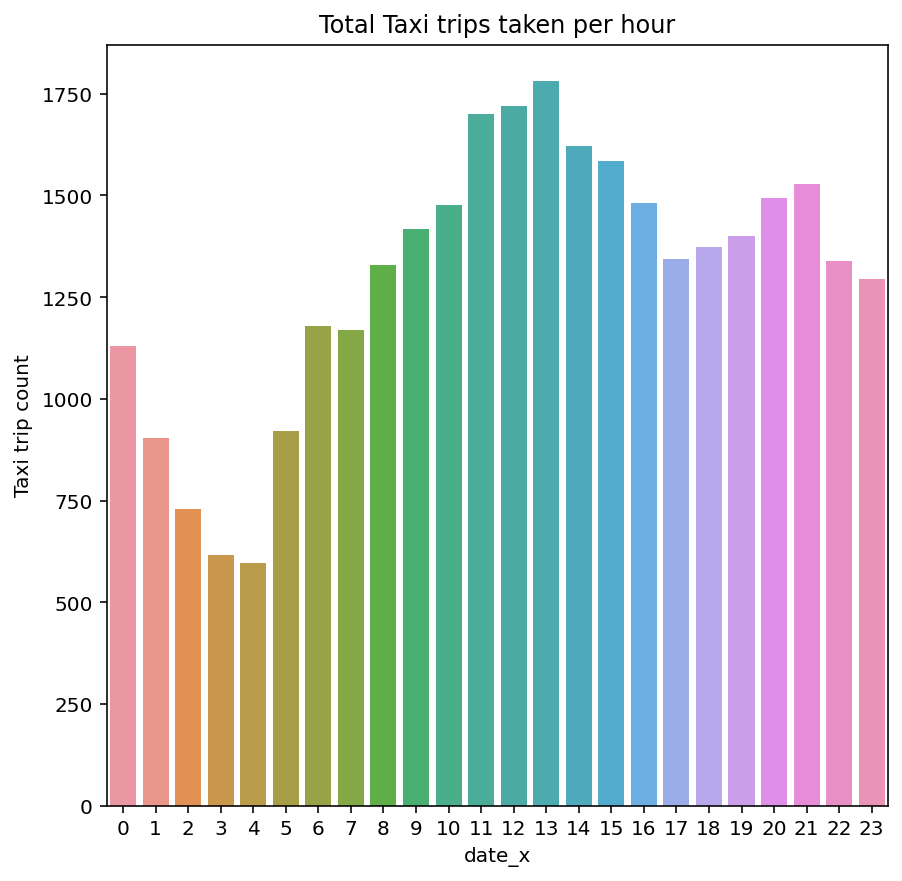

In [143]:
plt.figure(figsize=(7,7))
plt.xlabel('hour')
plt.ylabel('Taxi trip count')
plt.title('Total Taxi trips taken per hour')
sns.barplot(x=day_taxi19.index,y=day_taxi19.values)

We compile the hours into 4 different sections of the day, namely morning, afternoon, evening and night, each having its own specific time ranges.

In [144]:
day_taxi19.values

array([1129,  905,  730,  617,  597,  920, 1178, 1169, 1329, 1417, 1476,
       1700, 1719, 1782, 1622, 1585, 1482, 1343, 1374, 1401, 1494, 1528,
       1340, 1295])

In [145]:
morning=0
i=5
while i<12:
  morning=day_taxi19[i]+morning
  i=i+1
afternoon=0
j=12
while j<17:
  afternoon=day_taxi19[j]+afternoon
  j=j+1
k=17
evening=0
while k<21:
  evening=evening+day_taxi19[k]
  k=k+1
night=0
night=day_taxi19[21]+day_taxi19[22]+day_taxi19[23]+day_taxi19[0]+day_taxi19[1]+day_taxi19[2]+day_taxi19[3]+day_taxi19[4]

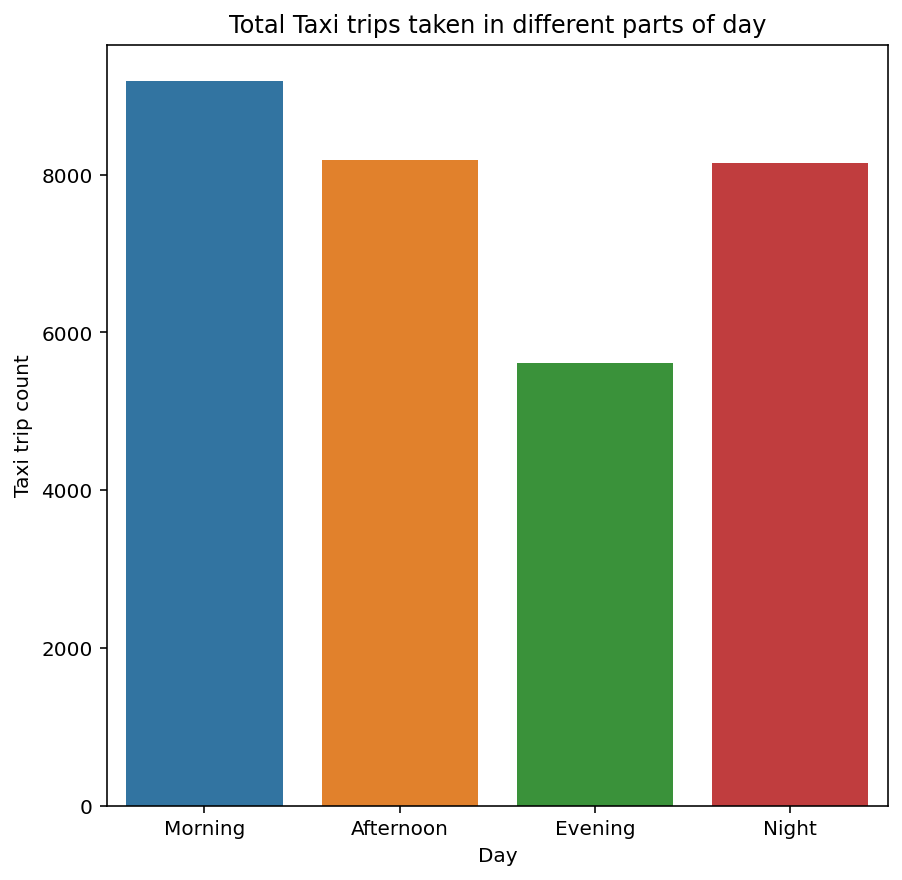

In [146]:
plt.figure(figsize=(7,7))
plt.xlabel('Day')
plt.ylabel('Taxi trip count')
plt.title('Total Taxi trips taken in different parts of day')
sns.barplot(x=['Morning','Afternoon','Evening','Night'],y=[morning,afternoon,evening,night])

As we can see, taxi trips peak at morning time of the day, and is the second busiest during the nights. This can be explained by the fact that people coming to Bangkok for various reasons, as tourists or for a business trip, might find it favourable to leave in the morning to visit different places and come back to their accomodations in the night.

In [147]:
taxi_df.columns

Index(['lat_x', 'lon_x', 'speed_x', 'heading_x', 'engine_acc_x',
       'trajectory_id', 'VehicleID_y', 'lat_y', 'lon_y', 'speed_y',
       'heading_y', 'engine_acc_y', 'date_x', 'date_y'],
      dtype='object')

### DATA PREPROCESSING AND CLEANING FOR TOURIST_DF DATASET

In [148]:
tourist_df.info() #we will be using this dataset to develop classification models based on the tourist_type target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33029 entries, 0 to 33028
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VehicleID        33029 non-null  object 
 1   trajectory_id    33029 non-null  object 
 2   date_time_o      33029 non-null  object 
 3   date_time_d      33029 non-null  object 
 4   category_o       33029 non-null  object 
 5   subcategory_o    33029 non-null  object 
 6   category_d       33029 non-null  object 
 7   subcategory_d    33029 non-null  object 
 8   lat_o            33029 non-null  float64
 9   lon_o            33029 non-null  float64
 10  lat_d            33029 non-null  float64
 11  lon_d            33029 non-null  float64
 12  distance         33029 non-null  int64  
 13  time_used        33029 non-null  float64
 14  tourist_type     33029 non-null  object 
 15  trajectory_type  33029 non-null  object 
dtypes: float64(5), int64(1), object(10)
memory usage: 4.0+ MB


In [149]:
tourist_df.drop(['trajectory_id'],axis=1,inplace=True)

In [150]:
tourist_df['subcategory_d'].unique() #according to the output of this, there are too many classes to analyze, this column would not help in analysis as well as predictions so I will drop it.

array(['Karaoke Bar', 'Spa', 'Thai Restaurant', 'Lounge',
       'Pedestrian Plaza', 'Asian Restaurant', 'Restaurant',
       'Shopping Mall', 'Sukiyaki Restaurant', 'Fast Food Restaurant',
       'Chinese Restaurant', 'Korean Restaurant', 'Bakery', 'Music Venue',
       'Noodle House', 'Indian Restaurant', 'Middle Eastern Restaurant',
       'Vietnamese Restaurant', 'Hamburger Restaurant', 'Metro Station',
       'Som Tum Restaurant', 'Italian Restaurant', 'Bar', 'Café', 'Cafe',
       'Pizza Place', 'Buffet', 'Food', 'Japanese Restaurant',
       'Professional & Other Places', 'Sushi Restaurant', 'Museum',
       'Seafood Restaurant', 'ฺBar', 'Halal Restaurant',
       'Fried Chicken Joint', 'Dumpling Restaurant', 'Nightclub',
       'Coffee Shop', 'Vegetarian / Vegan Restaurant', 'Market',
       'Gym / Fitness Center', 'Garden Center', 'Beer Bar',
       'Cocktail Bar', 'Pub', 'Hotel Bar', 'Beer Garden', 'Strip Club',
       'Gay Bar', 'Bistro', 'Tibetan Restaurant',
       'Shabu-

In [151]:
tourist_df.drop(['subcategory_d'],axis=1,inplace=True)

In [152]:
tourist_df['category_d'].unique()

array(['NightClub/Bar', 'Spa', 'Restaurant', 'Shopping Mall', 'Religious',
       'Leisure'], dtype=object)

In [153]:
tourist_df['category_d']=tourist_df['category_d'].replace(['Shopping Mall'],'malls')
tourist_df['category_d']=tourist_df['category_d'].replace(['Religious'],'religious_place')
tourist_df['category_d']=tourist_df['category_d'].replace(['Leisure'],'malls')

In [154]:
tourist_df['subcategory_o'].unique() 

array(['Hotel', 'Hostel', 'Bed & Breakfast',
       'Residential Building (Apartment / Condo)', 'Inn', 'Apartment',
       'Resort', 'inn', 'Homestay', 'Condo', 'Hotel Pool', 'Mansion'],
      dtype=object)

In [155]:
#since category_o does not provide useful information about the tourists, I choose to drop this from our dataset too.
tourist_df.drop(['category_o'],axis=1,inplace=True)

In [156]:
tourist_df['subcategory_o']=tourist_df['subcategory_o'].replace(['Residential Building (Apartment / Condo)','Apartment','Condo','Homestay','Mansion'],'residential_accomodation')
tourist_df['subcategory_o']=tourist_df['subcategory_o'].replace(['Hotel','Hotel Pool','Resort','inn','Inn'],'hotel')
tourist_df['subcategory_o']=tourist_df['subcategory_o'].replace(['Hostel','Bed & Breakfast'],'hostel')

In [157]:
new_col_names={'VehicleID':'vehicle_ID','date_time_o':'date_time_o','date_time_d':'date_time_d','subcategory_o':'category_o','category_d':'category_d','lat_o':'lat_o', 'lon_o':'lon_o', 'lat_d':'lat_d', 'lon_d':'lon_d','distance':'distance','time_used':'duration','tourist_type':'tourist_type','trajectory_type':'trip'}
tourist_df.rename(columns=new_col_names,inplace=True)

In [158]:
tourist_df['trip']=tourist_df['trip'].replace(['FoodAndDrinkTrip'],'food_drink')
tourist_df['trip']=tourist_df['trip'].replace(['LeisureTrip'],'nightlife')
tourist_df['trip']=tourist_df['trip'].replace(['NightlifeTrip'],'nightlife')
tourist_df['trip']=tourist_df['trip'].replace(['ReligiousTrip'],'religious')
tourist_df['trip']=tourist_df['trip'].replace(['ShoppingTrip'],'shopping')
tourist_df['trip']=tourist_df['trip'].replace(['SpaTrip'],'spa')

In [159]:
tourist_df['distance']=tourist_df['distance']/1000.0

In [160]:
dt_o=[]
for st in tourist_df['date_time_o']:
    dt_o.append(st.split( ))

In [161]:
tourist_df['date_o']=pd.to_datetime(tourist_df['date_time_o'])

In [162]:
tourist_df['date_d']=pd.to_datetime(tourist_df['date_time_d'])

In [163]:
tourist_df.drop(['date_time_o', 'date_time_d'],axis=1,inplace=True)

In [164]:
tourist_df.columns

Index(['vehicle_ID', 'category_o', 'category_d', 'lat_o', 'lon_o', 'lat_d',
       'lon_d', 'distance', 'duration', 'tourist_type', 'trip', 'date_o',
       'date_d'],
      dtype='object')

## EDA OF TOURIST_DF DATASET

In [165]:
tourist_df['trip'].groupby(tourist_df['trip']).count() 

trip
food_drink     9982
nightlife     10023
religious       852
shopping       2740
spa            9432
Name: trip, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



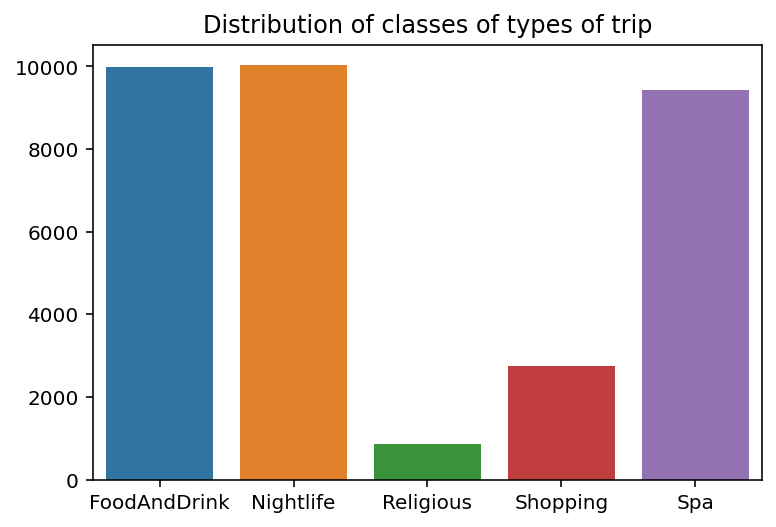

In [166]:
plt.title('Distribution of classes of types of trip')
sns.barplot(['FoodAndDrink','Nightlife','Religious','Shopping','Spa'],[9982,10023,852,2740,9432])

As we can see, the distribution of target classes are imbalanced, leading us to develop a model for an imbalanced classification problem. First things first, we could try and reduce one minority class by combining Leisure trips and Nightlife trips together as they seem synonymous. The rest are kept as it is.

In [167]:
fig=px.density_mapbox(tourist_df,lat='lat_o',lon='lon_o',title='Accomodations taken up by tourists in and around Bangkok',radius=1,center=dict(lat=13.7543,lon=100.542),zoom=9,hover_name='category_o',color_continuous_scale='viridis_r',mapbox_style='stamen-terrain')
fig.show()

Majority of the accomodations are restricted to the central parts of the city,where we can observe almost minimal residential accomodations, which are more prevalent on the outskirts.

In [168]:
fig=px.density_mapbox(tourist_df,lat='lat_d',lon='lon_d',title='Various places visited by all tourists in & around the city',radius=1,center=dict(lat=13.7498,lon=100.5417),zoom=10,hover_name='category_d',color_continuous_scale='jet',mapbox_style='stamen-terrain')
fig.show()

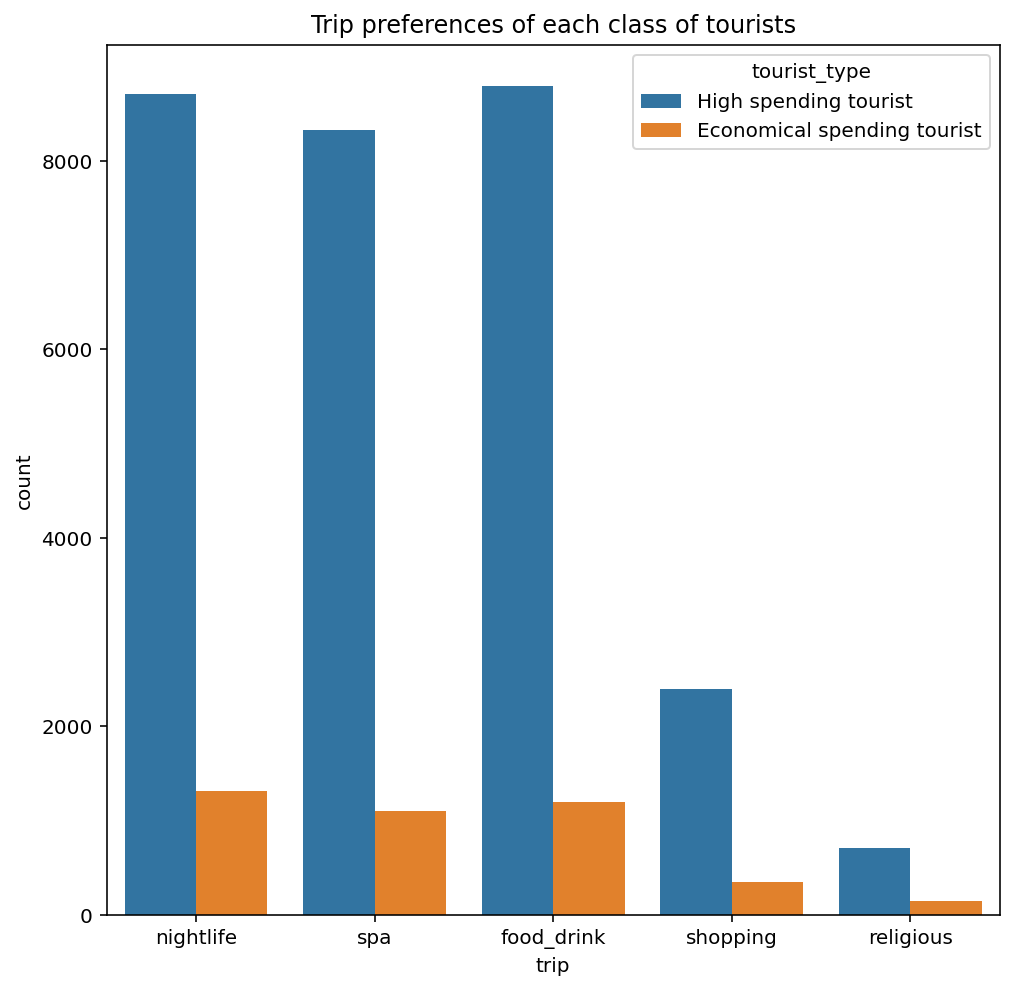

In [169]:
plt.figure(figsize=(8,8))
plt.xlabel('Type of trip')
plt.title('Trip preferences of each class of tourists')
sns.countplot(x='trip',data=tourist_df,hue='tourist_type')

Here, we observe that majority of tourists classified as "high-spenders", overwhelmingly prefer visiting spas, go on food & drink trips and also choose to roam the city at nighttime, a similar observation can be made about the "economical-spenders", thus we can conclude that spas, restaurants, cafes, and nightlife attracts most tourists to the city, based on the recorded data.

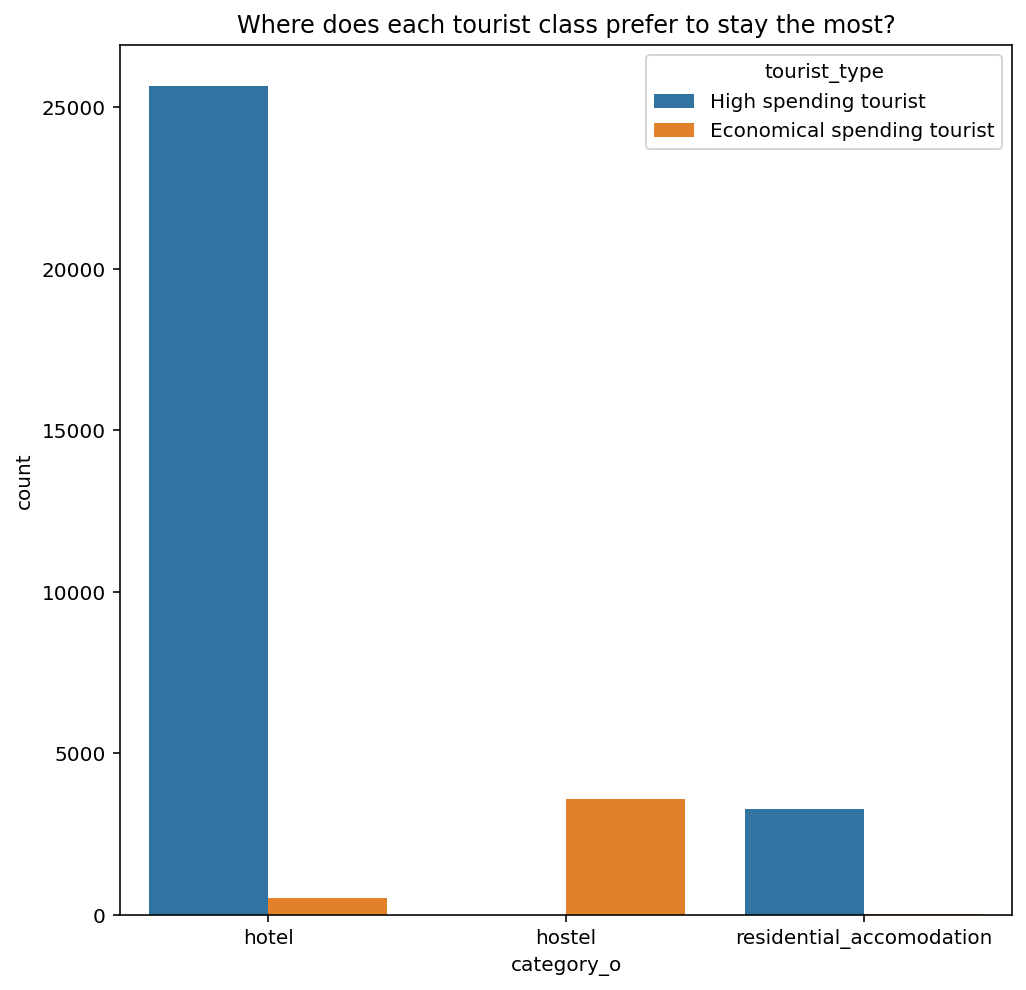

In [170]:
plt.figure(figsize=(8,8))
plt.xlabel('Type of trip')
plt.title('Where does each tourist class prefer to stay the most?')
sns.countplot(x='category_o',data=tourist_df,hue='tourist_type')

We observe that most of the high spending tourists prefer to stay at their own residential accomodations or hotels, which are far more expensive choices as compared to hostels, which are only preferred by economical spending tourists. This feature will be a distinguishing factor while predicting whether or not a tourist is high spending or a cautious spender.

In [171]:
tourist_df.columns

Index(['vehicle_ID', 'category_o', 'category_d', 'lat_o', 'lon_o', 'lat_d',
       'lon_d', 'distance', 'duration', 'tourist_type', 'trip', 'date_o',
       'date_d'],
      dtype='object')

In [172]:
#separating month,hour and day from date_o and date_d.
hours=[]
days=[]
months=[]
for i in tourist_df['date_o']:
  hours.append(i.hour)
for j in tourist_df['date_o']:
  days.append(j.day)
for k in tourist_df['date_o']:
  months.append(k.month)  
tourist_df['hour']=hours
tourist_df['day']=days
tourist_df['month']=months  

In [173]:
fig=px.histogram(tourist_df,x='distance')
fig.show()

As seen from the histogram, the distribution of distances travelled is right-skewed. Distance values are assumed to be recorded in kilometres.

In [174]:
fig = px.histogram(tourist_df, x="trip", y="duration", color="tourist_type",title='Time spent by each class of tourists on commuting(in minutes)')
fig.show()

The histogram plotted accurately shows the time spent by each class of tourists while going to their preferred trip destinations. From the plot it is evident that, high-spenders commute the most and the longest trips have been those where the end objective was to reach food and drink outlets.

In [175]:
tourist_df_1=tourist_df.copy()
tourist_df_1.drop(['lat_o', 'lon_o', 'lat_d','lon_d'],axis=1,inplace=True)

## FEATURE ENGINEERING AND SELECTION FOR "TOURIST_TYPE" variable

Target variable here will be "tourist_type", which classifies tourists on the basis of their spending behaviour. Predicting the spending nature of a tourist would be important in the context of consumer behaviour as it would contribute to targeted advertising and help the tourism companies to suggest travel packages accordingly to the tourists.

In [176]:
tourist_df_1.drop(['date_o','date_d'],axis=1,inplace=True)

In [177]:
tourist_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33029 entries, 0 to 33028
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vehicle_ID    33029 non-null  object 
 1   category_o    33029 non-null  object 
 2   category_d    33029 non-null  object 
 3   distance      33029 non-null  float64
 4   duration      33029 non-null  float64
 5   tourist_type  33029 non-null  object 
 6   trip          33029 non-null  object 
 7   hour          33029 non-null  int64  
 8   day           33029 non-null  int64  
 9   month         33029 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.5+ MB


In [178]:
tourist_df_1.drop(['vehicle_ID'],axis=1,inplace=True)

In [179]:
tourist_df_1.drop(['category_d'],axis=1,inplace=True)

In [180]:
#normalizing numeric values(distance, duration) between 0 to 1 (since both the variables are either positive or zero, we choose this range)
scaler=preprocessing.MinMaxScaler()
cols=['distance','duration']
df_norm=scaler.fit_transform(tourist_df_1[cols])
scaled_df = pd.DataFrame(df_norm,columns=cols)
tourist_df_1[cols[0]]=scaled_df[cols[0]]
tourist_df_1[cols[1]]=scaled_df[cols[1]]

In [181]:
#label encoding process for categorical variables
label=preprocessing.LabelEncoder()
cat_list=['category_o','trip','tourist_type']
for col in cat_list:
  tourist_df_1[col]=label.fit_transform(tourist_df_1[col])

In [182]:
tourist_df_1['day']=tourist_df_1['day'].replace([12,13,14,15,16,17],11)

In [183]:
tourist_df_1.columns

Index(['category_o', 'distance', 'duration', 'tourist_type', 'trip', 'hour',
       'day', 'month'],
      dtype='object')

In [184]:
y1=tourist_df_1['tourist_type']

In [185]:
tourist_df_1.drop(['tourist_type'],axis=1,inplace=True)

In [186]:
X1_train, X1_holdout, y1_train, y1_holdout = train_test_split(tourist_df_1.values,y1,test_size=0.3,random_state=17) #splitting into training and test datasets for model training and evaluation.

### DEVELOPING CLASSIFICATION MODELS FOR PREDICTING TOURIST CLASS

In [187]:
#decision tree classifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=17,max_features=3)
dec_tree.fit(X1_train,y1_train)
result_dect=dec_tree.predict(X1_holdout)
print(f"Accuracy of the decision tree classifier is: {accuracy_score(y1_holdout,result_dect)}")

Accuracy of the decision tree classifier is: 0.9507518417600161


In [188]:
from sklearn.ensemble import RandomForestClassifier #importing random forest classifier model from sklearn
random_for=RandomForestClassifier(max_features=5,max_depth=7,random_state=15) #setting model parameters
random_for.fit(X1_train,y1_train) #fitting the training datasets to the model
result_rf=random_for.predict(X1_holdout) #predicting outcomes for the test data
print(f"Accuracy of the classifier is: {accuracy_score(y1_holdout,result_rf)}")

Accuracy of the classifier is: 0.9839539812291855


In [189]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
xgbc=XGBClassifier(random_state=5,max_depth=1)
xgbc.fit(X1_train,y1_train)
result_xgbc=xgbc.predict(X1_holdout)
print(f"Accuracy of the classifier is: {accuracy_score(y1_holdout,result_xgbc)}")

Accuracy of the classifier is: 0.9839539812291855


As we can see above, the highest classification accuracy of predicting whether or not a tourist is a high-spender or an economical spender, is approximately 98.395%, which is obtained by using both the RandomForestClassifier model and the XG Boost classifier model. The DecisionTree model gives the lowest accuracy out of the three models applied.

We can implement either of these models on unseen data.